<a href="https://colab.research.google.com/github/EvgenieLebedev/deep-learning-methods/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing(as_frame=True)

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


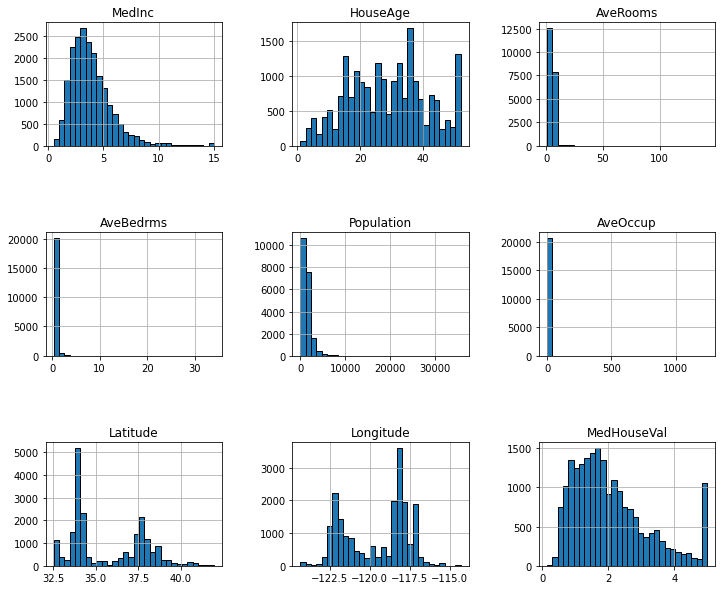

In [ ]:
import matplotlib.pyplot as plt

data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.1, random_state=123)

#нормируем данные по формуле (Хi-M[x])/СКО , где M[x]-мат. ожидание СКО- средняя квадратическая ошибка
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

1.2. Создайте архитектуру для этой задачи

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))


1.3. Скомпилируйте сеть
Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1.4. Обучите нейросеть
Выберите нужное количество эпох.

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
552/552 [==============================] - 2s 2ms/step - loss: 0.6587 - mae: 0.5532 - val_loss: 0.7867 - val_mae: 0.4693
Epoch 2/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3762 - mae: 0.4339 - val_loss: 0.3839 - val_mae: 0.4445
Epoch 3/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3528 - mae: 0.4178 - val_loss: 0.4210 - val_mae: 0.4166
Epoch 4/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3259 - mae: 0.4004 - val_loss: 0.3332 - val_mae: 0.3950
Epoch 5/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3180 - mae: 0.3910 - val_loss: 0.6301 - val_mae: 0.4314
Epoch 6/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3074 - mae: 0.3840 - val_loss: 0.3037 - val_mae: 0.3915
Epoch 7/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3041 - mae: 0.3799 - val_loss: 0.3123 - val_mae: 0.3953
Epoch 8/100
552/552 [==============================] - 1s 2ms/step - 

1.5. Сделайте вывод, хорошо ли модель обучается?
Если модель обучается плохо, можете внести изменения в работ

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

P.S.: Сеть скорее всего обучается плохо, так как данные не масштабированы.

1.6. Сделайте предсказания на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

65/65 [==============================] - 0s 1ms/step
Средняя абсолютная ошибка: 33608$


1.7. Посчитайте метрику качества на тестовых данных

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

65/65 [==============================] - 0s 1ms/step - loss: 0.2485 - mae: 0.3361
Mean squared error on test data:  0.24854563176631927
Mean absolute error on test data:  0.3360888361930847


Сравним с моделью линейной регресии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  0.5276834517875307
Mean absolute error on test data:  0.5286516568124461


Проверим на той де модели другую нормализацию данных 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.1, random_state=123)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Тренируем данные

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
523/523 [==============================] - 1s 2ms/step - loss: 0.6010 - mae: 0.5650 - val_loss: 0.4740 - val_mae: 0.4855
Epoch 2/100
523/523 [==============================] - 1s 3ms/step - loss: 0.4891 - mae: 0.5042 - val_loss: 0.4581 - val_mae: 0.4779
Epoch 3/100
523/523 [==============================] - 1s 3ms/step - loss: 0.4748 - mae: 0.4929 - val_loss: 0.4517 - val_mae: 0.4886
Epoch 4/100
523/523 [==============================] - 1s 2ms/step - loss: 0.4683 - mae: 0.4892 - val_loss: 0.4436 - val_mae: 0.4846
Epoch 5/100
523/523 [==============================] - 1s 2ms/step - loss: 0.4577 - mae: 0.4808 - val_loss: 0.4405 - val_mae: 0.4571
Epoch 6/100
523/523 [==============================] - 1s 2ms/step - loss: 0.4518 - mae: 0.4779 - val_loss: 0.4265 - val_mae: 0.4639
Epoch 7/100
523/523 [==============================] - 1s 2ms/step - loss: 0.4433 - mae: 0.4710 - val_loss: 0.4201 - val_mae: 0.4592
Epoch 8/100
523/523 [==============================] - 1s 2ms/step - 

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

In [ ]:
Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

65/65 [==============================] - 0s 2ms/step
Средняя абсолютная ошибка: 118481$


Изменим оптимизатор на AdamAX, установим batch_size = 50 
Изменим архитетктуру

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='linear', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [ ]:
from tensorflow.keras.optimizers import Adamax
model.compile(optimizer=Adamax(learning_rate=0.05), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2304      
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=80,batch_size=50, validation_split=0.1)

Epoch 1/80
335/335 [==============================] - 2s 5ms/step - loss: 0.3779 - mae: 0.4382 - val_loss: 0.3705 - val_mae: 0.4272
Epoch 2/80
335/335 [==============================] - 1s 3ms/step - loss: 0.3765 - mae: 0.4385 - val_loss: 0.4066 - val_mae: 0.4438
Epoch 3/80
335/335 [==============================] - 1s 2ms/step - loss: 0.3761 - mae: 0.4378 - val_loss: 0.4167 - val_mae: 0.4464
Epoch 4/80
335/335 [==============================] - 1s 2ms/step - loss: 0.3771 - mae: 0.4378 - val_loss: 0.3669 - val_mae: 0.4233
Epoch 5/80
335/335 [==============================] - 1s 2ms/step - loss: 0.3694 - mae: 0.4342 - val_loss: 0.3869 - val_mae: 0.4486
Epoch 6/80
335/335 [==============================] - 1s 2ms/step - loss: 0.3761 - mae: 0.4383 - val_loss: 0.3769 - val_mae: 0.4433
Epoch 7/80
335/335 [==============================] - 1s 3ms/step - loss: 0.3731 - mae: 0.4361 - val_loss: 0.4185 - val_mae: 0.4474
Epoch 8/80
335/335 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

65/65 [==============================] - 0s 1ms/step
Средняя абсолютная ошибка: 52865$
